Liechti Matthieu, Loup Olivia

# Exercice 1 - Digit classification system using different SVM classifiers

## Imports

In [75]:
import gzip
import _pickle as cPickle

# Add your imports here
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import svm

## Exercise's steps

The objective of this exercise is to build a classification system able to classify the images of handwritten digits (0–9) coming from the MNIST database and using SVM with different types of kernels (linear, polynomial, RBF, ...). For that purpose, you will use the SVM library available in [_Scikit-learn_](http://scikit-learn.org).

### a. Getting the training and test sample sets from the MNIST database

#### a) Load MNIST digit dataset

In [76]:
# Load training, validation (not used in the PW) and test datasets
with gzip.open("mnist.pkl.gz", "rb") as f:
    train_set, valid_set, test_set = cPickle.load(f, encoding="latin1")

# Print the shape of the various datasets
print("Training set:", len(train_set[0]))
print("Validation set:", len(valid_set[0]))
print("Test set:", len(test_set[0]))

Training set: 50000
Validation set: 10000
Test set: 10000


In [77]:
X_train = train_set[0][:]
y_train = train_set[1][:]

X_val = valid_set[0][:]
y_val = valid_set[1][:]

X_test = test_set[0][:]
y_test = test_set[1][:]
print(train_set[1][:])

[5 0 4 ... 8 4 8]


#### b) Visualize (plot) the images of some digits of the MNIST database

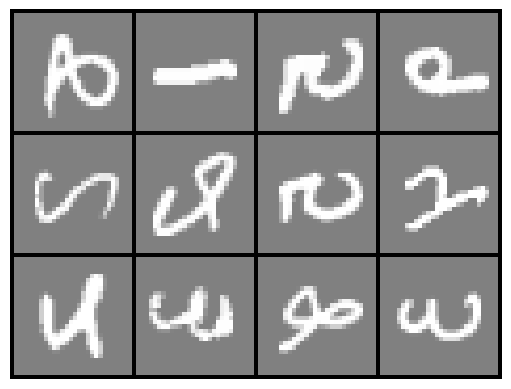

In [78]:
# Your code here
def displayDigits(X):
    # displays 2D data stored in X in a nice grid.
    # Input:
    # - X : [m x n] data set of hadwritten digits
    # Output:
    # -
    
    m,n = X.shape
    ex_width = np.round(np.sqrt(n)).astype('int')
    ex_height = (n/ex_width).astype('int')

    disp_rows = np.floor(np.sqrt(m)).astype('int')
    disp_cols = np.ceil(m/disp_rows).astype('int')

    pad = 1
    
    # Insert in display_array the samples from X
    display_array = - np.ones((pad+disp_rows*(ex_height+pad),pad+disp_cols*(ex_width+pad)))
    curr_ex = 0
    for j in range(0,disp_rows):
        for i in range(0,disp_cols):
            if curr_ex > m-1 :
                break
            XcurrEx =  X[[curr_ex],:]
            max_val = np.max(np.abs(XcurrEx))
            rowstart = pad+(j)*(ex_height+pad)
            rowend   = pad+(j)*(ex_height+pad) + (ex_height)
            colstart = pad+(i)*(ex_width+pad)
            colend   = pad+(i)*(ex_width+pad) + (ex_width)
            display_array[rowstart:rowend,colstart:colend] = np.reshape(XcurrEx,(ex_height,ex_width)).T/max_val

            curr_ex +=1

    plt.imshow(display_array,cmap = 'gray',vmin = -1,vmax = 1)
    plt.axis('off')
nSel = 12   
m = X_train.shape[0]
rand_idx = np.random.permutation(m)
Xsel = X_train[rand_idx[:nSel],:]
displayDigits(Xsel)    

#### c) Build the final training and test sets, which should be balanced

In [79]:
# Your code here
# data
nSel_valid = 200
nSel_test = 100   
m_val = X_val.shape[0]
m_test = X_test.shape[0]
rand_idx = np.random.permutation(m_val)
Xsel = X_val[rand_idx[:nSel_valid],:]
ysel = y_val[rand_idx[:nSel_valid]]


In [80]:
# basic test
clf = svm.SVC()
clf.fit(Xsel, ysel)
y_pred1 = clf.predict(X_test)
print(f"Simple SVM Pred = {np.mean(y_pred1 == y_test) * 100}%")
# linear
lin_clf = svm.SVC(kernel='linear')
lin_clf.fit(Xsel, ysel)
y_pred_lin = lin_clf.predict(X_test)
print(f"Linear SVM Pred = {np.mean(y_pred_lin == y_test) * 100}%")
# polynomial
poly_svc = svm.SVC(kernel='poly')
poly_svc.fit(Xsel, ysel)
y_pred_poly = poly_svc.predict(X_test)
print(f"Polynomial SVM Pred = {np.mean(y_pred_poly == y_test) * 100}%")
# RBF
rbf_svc = svm.SVC(kernel='rbf')
rbf_svc.fit(Xsel, ysel)
y_pred_rbf = rbf_svc.predict(X_test)
print(f"RBF SVM Pred = {np.mean(y_pred_rbf == y_test) * 100}%")
# sigmoid
sigmoid_svc = svm.SVC(kernel='sigmoid')
sigmoid_svc.fit(Xsel, ysel)
y_pred_sigmoid = rbf_svc.predict(X_test)
print(f"Sigmoid SVM Pred = {np.mean(y_pred_sigmoid == y_test) * 100}%")
# precomputed
precomputed_svc = svm.SVC(kernel='precomputed')
gram_train = np.dot(Xsel, Xsel.T)
precomputed_svc.fit(gram_train, ysel)
y_pred_precomputed = rbf_svc.predict(X_test)
print(f"Precomputed SVM Pred = {np.mean(y_pred_precomputed == y_test) * 100}%")

Simple SVM Pred = 81.17%
Linear SVM Pred = 80.67999999999999%
Polynomial SVM Pred = 72.26%
RBF SVM Pred = 81.17%
Sigmoid SVM Pred = 81.17%
Precomputed SVM Pred = 81.17%


In [94]:
# new data
nSel_valid = 1000
nSel_test = 500 
m_val = X_val.shape[0]
m_test = X_test.shape[0]
rand_idx = np.random.permutation(m_val)
Xsel = X_val[rand_idx[:nSel_valid],:]
ysel = y_val[rand_idx[:nSel_valid]]

# RBF
rbf_svc = svm.SVC(kernel='rbf')
rbf_svc.fit(Xsel, ysel)
y_pred_rbf = rbf_svc.predict(X_test)
print(f"RBF SVM Pred = {np.mean(y_pred_rbf == y_test) * 100}%")

RBF SVM Pred = 91.86999999999999%


around 800-1000 for valid set, it seem that's the limit

RBF SVM Pred = 88.8%


The best one are variable depend the dataset

### b. Classification of digits based on raw pixel values using SVM and different kernels

Create, train and test several SVM classifiers with different kernels (linear, polynomial, RBF, ...). For the training, perform a cross-validation using 10 folds, and test different with several $C$ and kernel parameter values (e.g. for $\gamma$ for RBF kernel) in order to get the best classifier. After the test, display the classification performances and confusion matrix of each SVM classifier (see class _metrics_).

In [81]:
# Your code here

### c. (Optional) Impact of preprocessing and feature extraction

Analyse the impact of the classification performances using the following preprocessing and feature extraction steps:

#### a) Preprocessing step: convert images to binary (i.e. black and white) representations 

In [82]:
# Your code here

#### b) Feature extraction steps:
* Horizontal and vertical projections (i.e. compute the sum of grey pixel values along the the X and Y-axis)
* Local binary patterns
* Any other usable image features that you may have found

In [83]:
# Your code here

### d. Analysis of the results

Analyse the results obtained with the best SVM classifier.

a) Which kernel and parameters were used?

_Your answer here_

b) Which digit classes are the best/worse recognized against which? Why?

_Your answer here_

c) What is the impact of the sizes of the training and test sets on the classification performance?

_Your answer here_